## Plot the results from the other software

In [2]:
# running in 'capture' to suppress install message
from IPython.utils import io

with io.capture_output() as captured:
	# importing ipython to run magic functions from script
	from IPython import get_ipython
	ipython = get_ipython()
	ipython.magic("matplotlib inline");
#display(HTML(style));

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg

721 10801 2881


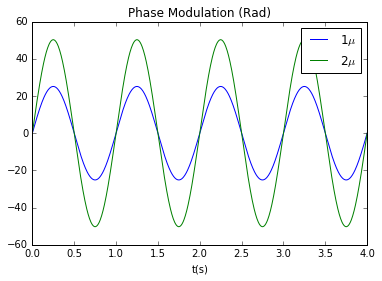

In [10]:
# Read the file from a text
#a = np.loadtxt("Vibration_045mu.txt")
a1 = np.loadtxt("Vibration_1mu.txt")
a2 = np.loadtxt("Vibration_2mu.txt")
#am = np.loadtxt("Vibration_2freq.txt")
#tm = np.arange(0,8+1/360,1/360)
t = np.arange(0,4+1/180,1/180)
print(len(t), len(am), len(tm))
#plt.plot(t,a, label="0.45$\mu$")
plt.plot(t,a1, label="1$\mu$")
plt.plot(t,a2, label="2$\mu$")
#plt.plot(tm,am, label="2 frequencies")
plt.legend()
plt.xlabel('t(s)')
plt.title('Phase Modulation (Rad)')
#plt.show()
plt.savefig('img_out/PhaseModulation.png')

#len(t) , len(a)

In [4]:
max(a)/np.pi , max(a1)/np.pi

(3.6000000000000143, 7.9999999999999849)

In [5]:
  #2.8
  
-5.2/4 
  
def mod(a,b):
        q = int(a/b)  
        
        return a-b*q
def modpy(a,b):
        q = (int(a/b))  
        r= (a)-(b)*(q)
        if r > 0:
            return r
        else:
            return abs(b)+r

x = 5.2
y = -4
xx = modpy(x,y)
print(xx)
-5.2%4
nn = np.zeros(2)
nn[1] = 1
nn

1.2000000000000002


array([ 0.,  1.])

# methods to check the upconversion phenomena in phase modulation
Since the main point that may help to find the upconversion phenomenas is the phase change of the photons when they hit a vibrating wall, it means that phase change, in case there is upconversion, will be higher than $\pi$, but the phase is cyclic between $\pi$ and $-\pi$. From the fact that we can constrain the phase between those values, it would be theoretically possible to find a way in which this phase changes beyond a single wavelength, it's rescaled into a *single wavelength change* creating the upconversion phenomena.

Up to now, I have thought some methods that I want to check. Partly are explained on the **Wall vibrating** document
-  b = [(i-np.pi)%(2*np.pi)-np.pi for i in a]
- 



All that makes me question some things?

- Should I call the higher frequencies as harmonics?
- Shall I create many waves with many limits/frequencies in an array: $a = \pi \cdot[1..int(a/\pi)] $

## Some comments about the PSD and how to compute it:
from [Matlab's manual on signal processing](http://it.mathworks.com/help/signal/ug/psd-estimate-using-fft.html) we can find that:
$$ PSD = \dfrac{1}{f_{sampling}\cdot N} |fft(x)|^2 $$
Where $f_{sampling} means for the maximum sampling frequency which is 2 times the maximum obtained on the fft. Also there's the point that since we only use the positive frequencies, then we multiply the obtained PSD per 2 in order to obtain show all on the positive axis.

Another method to compute the PSD is to use one of the signal analysis functions available on *scipy* which already compute the PSD. One of those methods are [welch](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch) which applies a [window function](https://en.wikipedia.org/wiki/Window_function) and by default has the hanning


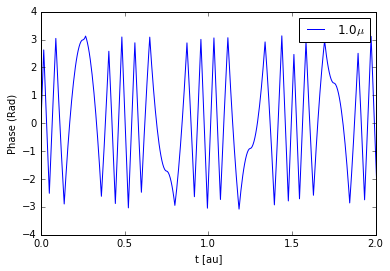

False

In [11]:
def iterlist(a):
    na = np.zeros(len(a))
    creciente = True
    for i in range(0,len(a)-1): # [0,1,..,range(a)]
        if i == 0: 
            na[0] = a[0]
        else:
            delta = abs(a[i]-a[i-1])
            if creciente:
                # we are on creciente             
                #print(delta)
                if ((na[i-1]+delta) < np.pi):  
                    #print(i, delta,na[i-1], creciente,'crece', np.pi)
                    na[i] = na[i-1]+delta
                else:
                    #print(i, delta,na[i-1], creciente,'decrece')
                    na[i] = na[i-1]-delta
                    creciente = False
                    
            else:
                # we are on creciente
                #delta = a[i]-a[i-1]
                #print(delta,'out')
                if (na[i-1]-delta) > -np.pi:  
                    na[i] = na[i-1]-delta
                else:
                    #print('bad place?')
                    na[i] = na[i-1]+delta
                    creciente = True
    return na

#c = iterlist(a)
c1 = iterlist(a1)
c2 = iterlist(a2)


#plt.plot(a,label="a")
#plt.plot(a1,label="a1")

#plt.plot(b,label="b")
#plt.plot(b1,label="b1")
#plt.plot(t,c,label="0.45$\mu$")
plt.plot(t,c1,label="1.0$\mu$")
#plt.plot(t,c2,label="2.0$\mu$")

plt.legend()
plt.ylabel('Phase (Rad)')
plt.xlabel('t [au]')
plt.xlim(0,2)
plt.savefig('img_out/PhaseModulation_scaled2.png')

plt.show()
3.3 < np.pi

In [39]:
2*np.pi*2*1*3.6

45.23893421169302

In [57]:
# Fourier transform
ta = np.fft.fft(a)  
 #tb = np.fft.fft(b)
tc = np.fft.fft(c)
tc1 = np.fft.fft(c1)
ta1 = np.fft.fft(a1)  
#tb1 = np.fft.fft(b1)
tc2 = np.fft.fft(c2)


In [10]:

len(ta)
mta = np.sqrt(ta.real*ta.real+ta.imag*ta.imag)
#mtb = np.sqrt(tb.real*tb.real+tb.imag*tb.imag)
mtc = np.sqrt(tc.real*tc.real+tc.imag*tc.imag)

mta1 = np.sqrt(ta1.real*ta1.real+ta1.imag*ta1.imag)
#mtb1 = np.sqrt(tb1.real*tb1.real+tb1.imag*tb1.imag)
mtc1 = np.sqrt(tc1.real*tc1.real+tc1.imag*tc1.imag)
#tb
mtc2 = np.sqrt(tc2.real*tc2.real+tc2.imag*tc2.imag)

len(mtc)/2


360.5

About the frequency axis, it's done in the way that $f_max$ is $1/\Delta t $ and the $f_min$ is done with the max sampling done on the time: $f_min = 0.5/T$

It must be taken into account the cyclic result of the fft, so the result will be starting from 0Hz and will go to the negative frequencies after arrivin to the mid value

In [145]:
xta = np.arange(-40,41,1/4)
xta1 = np.arange(-90.25,90,1/4)


len(xta1[361:]), len(mtc2[0:360])
#len(xta[40:80])
#len(np.arange(0.,1.5,(1./80.)))


(360, 360)

## Visualization of the upconversion phenomena

for the examples of A = $0.5\mu$ and $2\mu$ the result on the maximum upconverted frequency are $f_{max}$= $11.30973355Hz$ and $50.26548246Hz$.

Here I show the results with 2 different methods, one is the direct FFT of my data and the other one is the analysis done with the default welch function.

In [5]:
ma = 80
#plt.plot(xta2[0:ma],mta[0:ma],label="c")
#plt.plot(xta[80:ma+80],mtc[0:ma],label="$A=\lambda$") #[80:ma+80 [0:ma]
#plt.plot(xta[80:ma+80],mtc1[0:ma],label="$A=\lambda/2$")
x = np.arange(-90.25,90,1/4)
#
mult = 1e-6/3e3/4/np.pi
plt.loglog(x[361:],mult*mtc[0:360],label="$A=0.45\lambda$") # aprox 7
plt.loglog(x[361:],mult*mtc1[0:360],label="$A=1.0\lambda$") #aprox 15
#plt.loglog(x[361:],mult*mtc2[0:360],label="$A=2.0\lambda$") #[80:ma+80 [0:ma]
#plt.loglog(wa[0],mult*np.sqrt(wa[1]))
plt.legend()
plt.xlabel('Hz')
plt.xlim(1,90)
plt.ylim(ymin=1e-12)#,1e-7)
plt.title('Phase Noise')
plt.yticks()
plt.grid()
plt.savefig('img_out/upconversion.png')





NameError: name 'mtc' is not defined

In [6]:

wc = sg.welch(np.sin(a2), fs=180)
wa = sg.welch(np.sin(a),fs=180)
wb = sg.welch(np.sin(a1),fs=180)

#wcc = sg.welch(c,fs=180)

plt.semilogy(wc[0],mult*np.sqrt(wc[1]), label= "$2.0\mu m$")
#plt.loglog(wcc[0],mult*np.sqrt(wcc[1]), label= "other$0.45\mu m$") # my method doesn't work...
plt.loglog(wb[0],mult*np.sqrt(wb[1]), label = "$1.0\mu m$")
plt.loglog(wa[0],mult*np.sqrt(wa[1]), label = "$0.45\mu m$")

plt.legend(loc=3)

plt.title("Phase Noise with Welch periodogram with $\lambda = 0.5\mu m$")
plt.savefig('img_out/upconversion_with_welch')
plt.xlim(xmin=1, xmax=90)

NameError: name 'a' is not defined

#### Case where there are many frequencies on the element

10801 129


(1, 200)

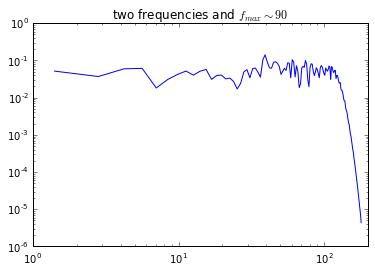

In [68]:
am = np.loadtxt("Vibration_2freq.txt")
wm = sg.welch(np.sin(am), fs=360)#,nperseg = 1024)
wm_s = sg.welch((am), fs=360,nperseg = 1024)
print(len(am),len(wm[0]))
plt.loglog(wm[0],np.sqrt(wm[1]))
plt.title("two frequencies and $f_{max}\sim 90$")
plt.xlim(1,200)

[ 0.         0.3515625  0.703125   1.0546875]


(0.0, 8)

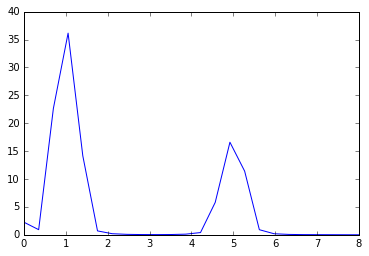

In [69]:
print(wm_s[0][0:4])
plt.plot(wm_s[0],np.sqrt(wm_s[1]))
plt.xlim(xmax = 8)

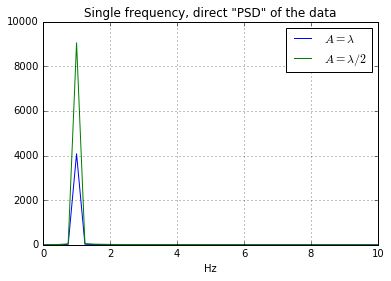

In [66]:
plt.plot(x[361:],mta[0:360],label="$A=\lambda$") #[80:ma+80 [0:ma]
plt.plot(x[361:],mta1[0:360],label="$A=\lambda/2$")

plt.legend()
plt.xlabel('Hz')
plt.xlim(0,10)
#plt.ylim(-10)
plt.title('Single frequency, direct "PSD" of the data')
plt.yticks()
plt.grid()
plt.savefig('img_out/SingleFreq.png')

plt.show()

In [67]:
plt.plot(xta[80:ma+80],mtb[0:ma],label="$A=\lambda$") #[80:ma+80 [0:ma]
plt.plot(xta[80:ma+80],mtb1[0:ma],label="$A=\lambda/2$")

plt.legend()
plt.xlabel('Hz')
plt.xlim(0,40)
#plt.ylim(-10)
plt.title('Done with b (bad)')
plt.yticks()
plt.grid()
plt.show()

NameError: name 'xta' is not defined

I have seen I did it wrong when I decided consider that $sin(f(x)) \sim f(x) $ when here cannot be considered...  
Thus, now that I have **a** as the direct phase and **c** as the one between ($-\pi,\pi$) I will apply the FFT to the $sin(\Delta \phi)$

In [70]:
# direct phase
sa = np.fft.fft(np.sin(a))
sa1 = np.fft.fft(np.sin(a1))
sa2 = np.fft.fft(np.sin(a2))
# Transformed phase
sc = np.fft.fft(np.sin(c))
sc1 = np.fft.fft(np.sin(c1))
sc2 = np.fft.fft(np.sin(c2))

# Module
msa = np.sqrt(sa.real*sa.real+sa.imag*sa.imag)
msa1 = np.sqrt(sa1.real*sa1.real+sa1.imag*sa1.imag)
msa2 = np.sqrt(sa2.real*sa2.real+sa2.imag*sa2.imag)

msc = np.sqrt(sc.real*sc.real+sc.imag*sc.imag)
msc1 = np.sqrt(sc1.real*sc1.real+sc1.imag*sc1.imag)
msc2 = np.sqrt(sc2.real*sc2.real+sc2.imag*sc2.imag)

In [6]:
# frequency axis 
x = np.arange(-90.25,90,1/4)
# multiplier
mult = 1e-6/3e3/4/np.pi

### Some comparatives

Since initially I used a method to see if my function to convert the phase between $\pm n\pi$ into phase only in $\pm\pi$ I have prepared some comparatives.

**Note: all are withouth the periodogram/welsh method**

One more comment is that sometimes there are different methods to do the fft and the way in which the $1/f_{max}N$ depends on the language used to compute the FFT, in python I only need to apply $1/f_{max}$ to make all the methods equivalents

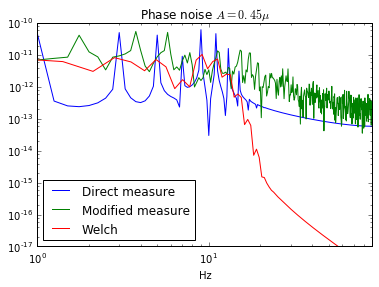

In [99]:
fmax = 90
plt.loglog(x[361:],mult*msa[0:360]/(fmax),label="Direct measure")
plt.loglog(x[361:],mult*msc[0:360]/(fmax),label="Modified measure")
plt.loglog(wa[0],mult*np.sqrt(wa[1]), label = "Welch")

plt.legend(loc = 3)
plt.xlim(1,90)
plt.ylim(ymin=1e-17)#,1e-7)
plt.title('Phase noise $A=0.45\mu$')
plt.xlabel('Hz')

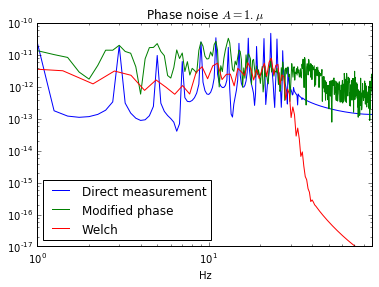

In [98]:
plt.loglog(x[361:],mult*msa1[0:360]/fmax,label="Direct measurement")
plt.loglog(x[361:],mult*msc1[0:360]/fmax,label="Modified phase")
plt.loglog(wb[0],mult*np.sqrt(wb[1]), label= "Welch")

plt.legend(loc = 3)
plt.xlim(1,90)
plt.ylim(ymin=1e-17)#,1e-7)
plt.title('Phase noise $A=1.\mu$')
plt.xlabel('Hz')

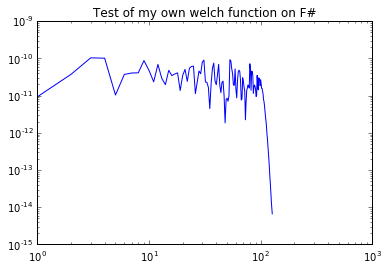

In [16]:
fourerAtFsharp2 = np.loadtxt('fourier1mu_.txt')
#plt.loglog(fourerAtFsharp)
plt.loglog(fourerAtFsharp2)
plt.title('Test of my own welch function on F#')

#len(fourerAtFsharp), len(wb[0])

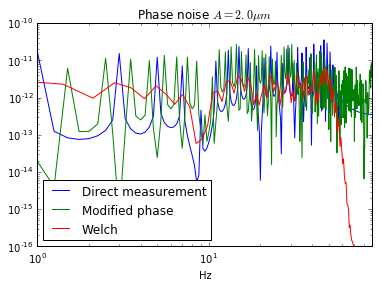

In [100]:
plt.loglog(x[361:],mult*msa2[0:360]/fmax,label="Direct measurement")
plt.loglog(x[361:],mult*msc2[0:360]/fmax,label="Modified phase")
plt.loglog(wc[0],mult*np.sqrt(wc[1]), label= "Welch")

plt.legend(loc = 3)
plt.xlim(1,90)
plt.ylim(ymin=1e-16)#,1e-7)
plt.title('Phase noise $A=2.0\mu m$')
plt.xlabel('Hz')

In [49]:
noisedone = np.loadtxt("Vibration1.txt")
noisedone_sin = np.loadtxt("Vibration1_sin.txt")

In [50]:
len(noisedone)
tmin = 0.0025
tmax = 4
xta = np.arange(-0.5/0.0025,0.5/0.0025,1/4)
len(xta)
len(xta[800:]), len(noisedone[0:800])

(800, 800)

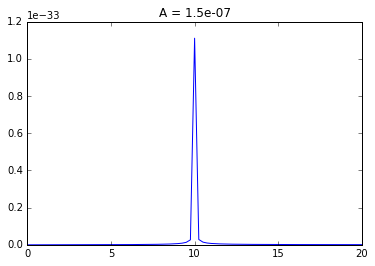

In [52]:
#plt.plot(xta[800:],noisedone[0:800])
plt.plot(xta[800:],noisedone_sin[0:800], label="A = 1.5e-07") # here there's no upconversion 
plt.ylim(ymin=10e-38)
plt.xlim(0,20)
plt.title("A = 1.5e-07")

In [82]:
noisedone_up = np.loadtxt("Vibration1_sin_upconversion.txt")


array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

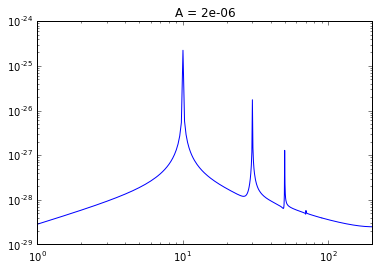

In [85]:
plt.loglog(xta[800:],noisedone_up[0:800], label="A = 1.5e-07") # here there's no upconversion 
plt.ylim(ymin=10e-30)
plt.xlim(1,200)
plt.title("A = 2e-06")

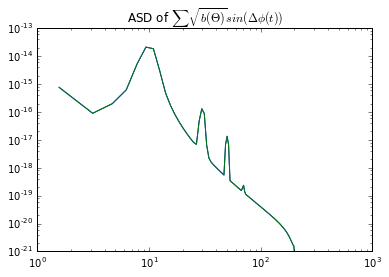

In [26]:
ph_processed = np.loadtxt("data/Vibration1_Save_Phase.txt")
wph = sg.welch((ph_processed), fs=400)
wphs = sg.welch(np.sin(ph_processed), fs=400)

plt.loglog(wph[0],mult*np.sqrt(wph[1]))
plt.loglog(wphs[0],mult*np.sqrt(wphs[1]))

plt.title("ASD of $\sum \sqrt{b( \Theta )} {sin(\Delta\phi(t))}$")

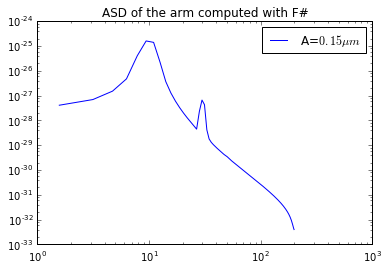

In [10]:
#noisedone_up = np.loadtxt("Vibration1_sin_upconversion.txt")
noisedone_up = np.loadtxt("data\Vibration1_all_upconversion.txt")
noisedone_upfreq = np.loadtxt("data\Vibration1_all_upconversion_freqs.txt")

plt.loglog(noisedone_upfreq,noisedone_up, label='A=$0.15\mu m$')
plt.title('ASD of the arm computed with F#')
plt.legend()
#plt.xlim(1,40)

(1e-32, 1e-23)

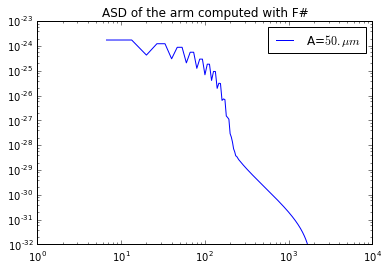

In [19]:
noisedone_up = np.loadtxt("data\Vibration1_all_upconversion.txt")
noisedone_upfreq = np.loadtxt("data\Vibration1_all_upconversion_freqs.txt")

plt.loglog(noisedone_upfreq,noisedone_up, label='A=$50.\mu m$')
plt.title('ASD of the arm computed with F#')
plt.legend()
plt.ylim(1e-32,1e-23)

(1e-32, 1e-23)

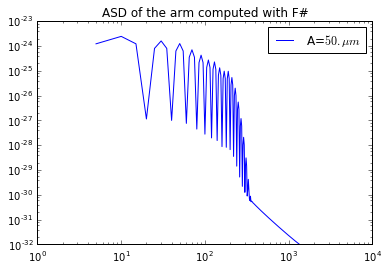

In [20]:
noisedone_up2 = np.loadtxt("data\Vibration1_all_upconversion.txt")
noisedone_upfreq2 = np.loadtxt("data\Vibration1_all_upconversion_freqs.txt")

plt.loglog(noisedone_upfreq2,noisedone_up2, label='A=$50.\mu m$')
plt.title('ASD of the arm computed with F#')
plt.legend()
plt.ylim(1e-32,1e-23)

## Comments about the pevious graphs
### Meaning

It's important to say that the last ones called *ASD of the arm* are the noise computation for the arm with no baffles.

The properties of material's tube are:
- Reflection of 95%
- Dispersion of 5%


### Discussion

The important question to discuss is: **Are those results good or not?** Based on the article, they found that an empty tube with a seismic noise at 10Hz, produces a noise at this frequency of $1.3x10^{-23}$ computed analitically, or around $10^{-23}$ based on the simulations. My result has been with a vibration on one axis of $50\mu m$ at 10Hz, that the noise is a plateu at approximately a couple of times $10^{-24}$. It's true that my values is one order of magnitude lower, but the upconversion phenomenas, expand all the '*energy*' of the noise into a spectrum. Thus even if the noise is afecting a range of frequencies, the value of the noise is lower. This means that the result shouldn't be wrong  
**:)**
